In [1]:
from pykrx import stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from sklearn.cluster import KMeans

In [350]:
def insertion_sort(arr):
    for end in range(1, len(arr)):
        i = end
        while i > 0 and arr[i - 1] > arr[i]:
            arr[i - 1], arr[i] = arr[i], arr[i - 1]
            i -= 1
            print(arr)

In [351]:
a = [10,5,4,1,9,3,6,8]


In [352]:
insertion_sort(a)

[5, 10, 4, 1, 9, 3, 6, 8]
[5, 4, 10, 1, 9, 3, 6, 8]
[4, 5, 10, 1, 9, 3, 6, 8]
[4, 5, 1, 10, 9, 3, 6, 8]
[4, 1, 5, 10, 9, 3, 6, 8]
[1, 4, 5, 10, 9, 3, 6, 8]
[1, 4, 5, 9, 10, 3, 6, 8]
[1, 4, 5, 9, 3, 10, 6, 8]
[1, 4, 5, 3, 9, 10, 6, 8]
[1, 4, 3, 5, 9, 10, 6, 8]
[1, 3, 4, 5, 9, 10, 6, 8]
[1, 3, 4, 5, 9, 6, 10, 8]
[1, 3, 4, 5, 6, 9, 10, 8]
[1, 3, 4, 5, 6, 9, 8, 10]
[1, 3, 4, 5, 6, 8, 9, 10]


In [3]:
total_data_2000_embedding = pd.read_csv(path + 'total_data_2000_embedding.csv', index_col = 0)
total_data_2001_embedding = pd.read_csv(path + 'total_data_2001_embedding.csv', index_col = 0)
total_data_2002_embedding = pd.read_csv(path + 'total_data_2002_embedding.csv', index_col = 0)
total_data_2003_embedding = pd.read_csv(path + 'total_data_2003_embedding.csv', index_col = 0)
total_data_2004_embedding = pd.read_csv(path + 'total_data_2004_embedding.csv', index_col = 0)
total_data_2005_embedding = pd.read_csv(path + 'total_data_2005_embedding.csv', index_col = 0)
total_data_2006_embedding = pd.read_csv(path + 'total_data_2006_embedding.csv', index_col = 0)
total_data_2007_embedding = pd.read_csv(path + 'total_data_2007_embedding.csv', index_col = 0)
total_data_2008_embedding = pd.read_csv(path + 'total_data_2008_embedding.csv', index_col = 0)
total_data_2009_embedding = pd.read_csv(path + 'total_data_2009_embedding.csv', index_col = 0)
total_data_2010_embedding = pd.read_csv(path + 'total_data_2010_embedding.csv', index_col = 0)
total_data_2011_embedding = pd.read_csv(path + 'total_data_2011_embedding.csv', index_col = 0)
total_data_2012_embedding = pd.read_csv(path + 'total_data_2012_embedding.csv', index_col = 0)
total_data_2013_embedding = pd.read_csv(path + 'total_data_2013_embedding.csv', index_col = 0)
total_data_2014_embedding = pd.read_csv(path + 'total_data_2014_embedding.csv', index_col = 0)
total_data_2015_embedding = pd.read_csv(path + 'total_data_2015_embedding.csv', index_col = 0)
total_data_2016_embedding = pd.read_csv(path + 'total_data_2016_embedding.csv', index_col = 0)
total_data_2017_embedding = pd.read_csv(path + 'total_data_2017_embedding.csv', index_col = 0)
total_data_2018_embedding = pd.read_csv(path + 'total_data_2018_embedding.csv', index_col = 0)
total_data_2019_embedding = pd.read_csv(path + 'total_data_2019_embedding.csv', index_col = 0)
total_data_2020_embedding = pd.read_csv(path + 'total_data_2020_embedding.csv', index_col = 0)
total_data_2021_embedding = pd.read_csv(path + 'total_data_2021_embedding.csv', index_col = 0)

In [300]:
def mdd(series):
  series = series.values
  cumseries = np.cumsum(series)
  mdd = 0
  for i, s in enumerate(cumseries):
    mdd_s = s - np.min(cumseries[i:])
    if mdd_s > mdd:
      mdd = mdd_s

  return mdd



def annual_yield_indicator(yield_):
  print('Annualized return : ', np.round(np.mean(yield_)*252, 2))
  print('Annualized std : ', np.round(np.std(yield_)*(252**0.5),2))
  print('Sharpe ratio : ', np.round(np.mean(yield_)*252
                                    /(np.std(yield_)*(252**0.5)),2))
  # print('Downside deviation : ', np.round(np.std(yield_[yield_<0])[0]*(252**0.5),2))
  # print('Sortino ratio : ', np.round(np.mean(yield_)[0]*252
  #                                  /(np.std(yield_[yield_<0])*(252**0.5)),2))
  print('Maximum drawdown(MDD) : ', np.round(mdd(yield_),2))
  # print('Calmar ratio : ', np.round(np.mean(yield_)[0]*252/mdd(yield_),2))

In [8]:
from dateutil.relativedelta import relativedelta

# self.five_years_ago_dates = date - relativedelta(years=5)

In [94]:
df = globals()['total_data_{}_embedding'.format(2001)][globals()['total_data_{}_embedding'.format(2001)]['cluster'] == 2]
pair_df = pd.DataFrame()
for ticker in df['TICKER']:
    pair_df = pd.concat([pair_df , stock.get_market_ohlcv('20001101','20011231',ticker[1:])['종가']], axis = 1)
pair_df.columns = df['TICKER']

pair_df_log = np.log(pair_df)

# log return
pair_df = pair_df_log.diff()


# remove NaN

logreturn = pair_df.drop(pair_df.index[0]).dropna(axis = 1)

log_sum = logreturn.sum(axis = 0)

minimum = log_sum.index[np.argmin(log_sum)]
maximum = log_sum.index[np.argmax(log_sum)]
pair = [minimum, maximum]
# print(minimum, maximum)

pair_1 = stock.get_market_ohlcv(str(2001 + 1)+'0101',str(2001 + 1)+'1231', pair[0][1:])
pair_2 = stock.get_market_ohlcv(str(2001 + 1) + '0101',str(2001 + 1) + '1231', pair[1][1:])


# log price
pair_1['log price'] = np.log(pair_1['종가'])
pair_2['log price'] = np.log(pair_2['종가'])

# log return
pair_1['log return'] = pair_1['log price'].diff()
pair_2['log return'] = pair_2['log price'].diff()


# remove NaN
logreturn1 = pair_1['log return'].dropna()
logreturn2 = pair_2['log return'].dropna()

profit = pd.concat([profit ,np.cumsum(logreturn1) - np.cumsum(logreturn2)], axis = 1)

In [96]:
logreturn

TICKER       A017670   A015760   A033780   A000660   A036460   A006800  \
2000-11-02  0.015501  0.019121  0.015666  0.081114  0.013159  0.009263   
2000-11-03  0.000000 -0.005698  0.000000  0.033902 -0.029159 -0.001567   
2000-11-06 -0.019403 -0.048790 -0.042334  0.003691 -0.008097 -0.013861   
2000-11-07  0.009748  0.050693  0.000000 -0.049156 -0.010880 -0.051293   
2000-11-08  0.063929  0.018833  0.000000 -0.051705 -0.016575 -0.025046   
...              ...       ...       ...       ...       ...       ...   
2001-12-21 -0.045058 -0.023586 -0.012707 -0.045130 -0.011344 -0.048656   
2001-12-24  0.000000  0.007134  0.027745  0.035267  0.028151 -0.016427   
2001-12-26  0.000000  0.016452  0.007435  0.138475  0.005559  0.001120   
2001-12-27  0.001996  0.011588 -0.063716  0.000000 -0.036611  0.075103   
2001-12-28  0.069534  0.000000  0.020834  0.042202 -0.005708  0.040037   

TICKER       A012450   A004370   A003540   A029530  ...   A020180   A036830  \
2000-11-02  0.018154 -0.001107  0.061875  0.000000  ...  0.024098 -0.001663   
2000-11-03  0.017830 -0.021368  0.039221  0.008197  ...  0.015748  0.000000   
2000-11-06  0.072693  0.009051 -0.012903 -0.004090  ... -0.015748  0.063654   
2000-11-07 -0.040466 -0.013607 -0.053346 -0.010299  ... -0.016000 -0.038191   
2000-11-08  0.002279  0.000000  0.000000 -0.010406  ...  0.000000  0.031140   
...              ...       ...       ...       ...  ...       ...       ...   
2001-12-21 -0.040632 -0.027771 -0.018809 -0.022389  ... -0.047253 -0.055818   
2001-12-24 -0.006768  0.001402 -0.012739 -0.015209  ... -0.032790 -0.025583   
2001-12-26  0.015968 -0.005642  0.000000 -0.019343  ... -0.051293  0.010545   
2001-12-27  0.023726  0.004241  0.068138  0.005842  ...  0.051293  0.001165   
2001-12-28  0.069782  0.015370  0.063790  0.007737  ...  0.016529  0.041055   

TICKER       A034940   A024800   A042940   A036180   A016250   A023810  \
2000-11-02 -0.006046 -0.008141 -0.010386 -0.066375 -0.029916 -0.035116   
2000-11-03  0.012722  0.051511 -0.047016  0.019418  0.112263  0.005093   
2000-11-06  0.111926  0.112940  0.111685  0.028438 -0.076675  0.030024   
2000-11-07 -0.008363 -0.093463 -0.118271 -0.038100  0.017330 -0.014899   
2000-11-08 -0.041647 -0.023108 -0.099504 -0.024571 -0.026108 -0.035653   
...              ...       ...       ...       ...       ...       ...   
2001-12-21 -0.024337 -0.014121 -0.071749 -0.015152 -0.039235 -0.037416   
2001-12-24 -0.002242  0.000000 -0.042206 -0.023167 -0.074193 -0.018928   
2001-12-26 -0.026153  0.026158 -0.017383 -0.031749 -0.085779  0.023916   
2001-12-27  0.026153 -0.012037  0.059588  0.008032  0.098073  0.009285   
2001-12-28 -0.005627  0.091304  0.032524  0.069526 -0.013892  0.032730   

TICKER       A046210   A036420  
2000-11-02  0.112812  0.004830  
2000-11-03  0.082687  0.055685  
2000-11-06 -0.005175  0.084012  
2000-11-07  0.112927 -0.027283  
2000-11-08  0.112620  0.108799  
...              ...       ...  
2001-12-21 -0.004546 -0.074530  
2001-12-24 -0.080834 -0.051946  
2001-12-26 -0.014932 -0.012647  
2001-12-27 -0.015158  0.034490  
2001-12-28  0.049659  0.112877  

[284 rows x 90 columns]

In [97]:
pair

['A005870', 'A005440']

In [75]:
pair_df_ = pair_df

In [82]:
pair_df_[pair_df_.columns[:20]].head(10)

TICKER                A003550   A001040   A000210   A000700   A000140  \
2000-01-04 00:00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 00:00:00 -0.059063 -0.123364 -0.075324  0.055116  0.000000   
2000-01-06 00:00:00 -0.062771 -0.106504 -0.053666 -0.083857 -0.043188   
2000-01-07 00:00:00  0.068036  0.000000  0.018211  0.028741 -0.035911   
2000-01-10 00:00:00  0.051307  0.027708 -0.009014  0.016306  0.030006   
2000-01-11 00:00:00 -0.002519  0.037545 -0.056070 -0.021214 -0.002938   
2000-01-12 00:00:00  0.000000  0.046269 -0.083169 -0.032509  0.063195   
2000-01-13 00:00:00  0.007495 -0.018248 -0.080515 -0.049498  0.056880   
2000-01-14 00:00:00  0.014823  0.062489 -0.009065 -0.033362 -0.014581   
2000-01-17 00:00:00  0.026604  0.000000 -0.040917 -0.020726 -0.002701   

TICKER                A003480   A003410   A006840   A001720   A004990  \
2000-01-04 00:00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 00:00:00 -0.064409 -0.052041 -0.001515 -0.002548  0.000000   
2000-01-06 00:00:00 -0.047180 -0.017439  0.007651 -0.052368  0.004073   
2000-01-07 00:00:00  0.015141  0.006895  0.061835  0.047253  0.015529   
2000-01-10 00:00:00  0.082709  0.003527  0.105694  0.020305  0.034035   
2000-01-11 00:00:00 -0.040328 -0.029983  0.052543  0.005013  0.112914   
2000-01-12 00:00:00 -0.035606 -0.072295 -0.002418 -0.025318  0.095342   
2000-01-13 00:00:00 -0.024098 -0.059366 -0.022270  0.000000  0.000000   
2000-01-14 00:00:00 -0.035572 -0.004147  0.036807  0.000000  0.029710   
2000-01-17 00:00:00 -0.025211 -0.037643 -0.067252  0.000000  0.017531   

TICKER                A002790   A002020   A035000   A015360   A003300  \
2000-01-04 00:00:00       NaN       NaN       NaN       NaN       NaN   
2000-01-05 00:00:00  0.057538 -0.049791 -0.058828  0.000000  0.020212   
2000-01-06 00:00:00 -0.039479  0.000000 -0.073361 -0.046069 -0.030234   
2000-01-07 00:00:00  0.019934  0.000000 -0.079071 -0.050902  0.030234   
2000-01-10 00:00:00  0.000000 -0.021092 -0.021842  0.063232  0.039239   
2000-01-11 00:00:00 -0.005130 -0.022487  0.095488  0.009756 -0.019427   
2000-01-12 00:00:00  0.000000 -0.044416 -0.035222  0.023982 -0.010087   
2000-01-13 00:00:00  0.048055 -0.027763  0.000000  0.000000  0.019622   
2000-01-14 00:00:00 -0.042925  0.016220  0.014947  0.041769  0.019244   
2000-01-17 00:00:00 -0.002928  0.021658  0.003726  0.022473  0.009705   

TICKER                A003460   A001750   A000990  A000080   A000540  
2000-01-04 00:00:00       NaN       NaN       NaN      NaN       NaN  
2000-01-05 00:00:00 -0.044861 -0.043803 -0.012780      NaN -0.054277  
2000-01-06 00:00:00 -0.035932 -0.061558 -0.069912      NaN -0.013474  
2000-01-07 00:00:00 -0.004890  0.011050  0.008584      NaN  0.000000  
2000-01-10 00:00:00  0.018215  0.020203 -0.006861      NaN  0.138093  
2000-01-11 00:00:00 -0.001204 -0.029667 -0.043982      NaN  0.035072  
2000-01-12 00:00:00 -0.030583 -0.032209 -0.027349      NaN -0.033341  
2000-01-13 00:00:00  0.006192  0.022655  0.067883      NaN  0.049575  
2000-01-14 00:00:00 -0.025001 -0.054245  0.063567      NaN -0.049575  
2000-01-17 00:00:00  0.012579  0.005055 -0.044746      NaN  0.000000

In [52]:
log_sum

TICKER
A003550    0.0
A001040    0.0
A000210    0.0
A000700    0.0
A000140    0.0
          ... 
A013720    0.0
A032860    0.0
A021880    0.0
A018700    0.0
A023790    0.0
Length: 103, dtype: float64

In [51]:
pair

['A003550', 'A003550']

In [122]:
profits = pd.DataFrame()

for year_ in range(2000,2022):

    profit = pd.DataFrame()  # cluster 하나에서의 해당년도 Pair Trading 저장 데이터프레임
    
    for cluster in range(10):

        df = globals()['total_data_{}_embedding'.format(year_)][globals()['total_data_{}_embedding'.format(year_)]['cluster'] == cluster]
        pair_df = pd.DataFrame()
        for ticker in df['TICKER']:
            pair_df = pd.concat([pair_df , stock.get_market_ohlcv(str(year_) + '0101', str(year_) + '1231',ticker[1:])['종가']], axis = 1)
        pair_df.columns = df['TICKER']

        pair_df_log = np.log(pair_df)

        # log return
        pair_df = pair_df_log.diff()


        # remove NaN
        logreturn = pair_df.drop(pair_df.index[0]).dropna(axis = 1)  # drop(첫날).drop(NaN값 들어가 있는 세로줄)

        log_sum = logreturn.sum(axis = 0)

        minimum = log_sum.index[np.argmin(log_sum)]
        maximum = log_sum.index[np.argmax(log_sum)]
        pair = [minimum, maximum]
        
        
        # print(minimum, maximum)

        pair_1 = stock.get_market_ohlcv(str(year_ + 1)+'0101',str(year_ + 1)+'1231', pair[0][1:])
        pair_2 = stock.get_market_ohlcv(str(year_ + 1) + '0101',str(year_ + 1) + '1231', pair[1][1:])


        # log price
        pair_1['log price'] = np.log(pair_1['종가'])
        pair_2['log price'] = np.log(pair_2['종가'])

        # log return
        pair_1['log return'] = pair_1['log price'].diff()
        pair_2['log return'] = pair_2['log price'].diff()


        # remove NaN
        logreturn1 = pair_1['log return'].dropna()
        logreturn2 = pair_2['log return'].dropna()

        profit = pd.concat([profit ,logreturn1 - logreturn2], axis = 1)

    profits = pd.concat([profits, profit], axis = 0) 

In [114]:
np.cumsum(profits)

log return  log return  log return  log return  log return  \
2001-01-03    0.053365   -0.047260    0.080908    0.030548    0.156732   
2001-01-04    0.146602   -0.124904    0.207518    0.175350    0.316821   
2001-01-05    0.157223   -0.171081    0.313212    0.221755    0.313172   
2001-01-08    0.182190   -0.118577    0.311633    0.315887    0.290754   
2001-01-09    0.329453   -0.089093    0.312440    0.370450    0.489814   
...                ...         ...         ...         ...         ...   
2002-12-23   -0.719198   -0.021061   -0.240147   -1.807323    1.874254   
2002-12-24   -0.784840   -0.166274   -0.298841   -1.699167    1.941493   
2002-12-26   -0.811516   -0.313747   -0.359217   -1.680596    1.825256   
2002-12-27   -0.784840   -0.319562   -0.378548   -1.728504    1.696529   
2002-12-30   -0.773981   -0.370852   -0.363520   -1.749210    1.809861   

            log return  log return  log return  log return  log return  
2001-01-03    0.031977    0.097418   -0.043016   -0.026819   -0.015204  
2001-01-04    0.118454    0.182594    0.128019   -0.053272    0.096704  
2001-01-05    0.186937    0.149692    0.166980    0.049486    0.369732  
2001-01-08    0.235647    0.198110    0.152563    0.037050    0.493988  
2001-01-09    0.263854    0.232053    0.256230    0.138283    0.636188  
...                ...         ...         ...         ...         ...  
2002-12-23    0.834094   -0.167324    1.220143    1.228641    1.100002  
2002-12-24    0.838816   -0.226026    1.343857    1.242650    1.063446  
2002-12-26    0.817322   -0.209620    1.384340    1.259407    1.049510  
2002-12-27    0.848617   -0.215060    1.259571    1.342424    1.078689  
2002-12-30    0.820149   -0.189752    1.176918    1.352243    1.020194  

[488 rows x 10 columns]

In [115]:
np.cumsum(profits).sum(axis = 1)/20

2001-01-03    0.015932
2001-01-04    0.059694
2001-01-05    0.087855
2001-01-08    0.104962
2001-01-09    0.146984
                ...   
2002-12-23    0.165104
2002-12-24    0.162756
2002-12-26    0.148057
2002-12-27    0.139966
2002-12-30    0.136603
Length: 488, dtype: float64

In [124]:
profits.to_csv('data/Pair_trading.csv')

In [126]:
prt = pd.read_csv('data/Pair_trading.csv', index_col = 0)
prt

log return  log return.1  log return.2  log return.3  \
2001-01-03    0.053365     -0.047260      0.080908      0.030548   
2001-01-04    0.093238     -0.077645      0.126611      0.144802   
2001-01-05    0.010621     -0.046177      0.105694      0.046405   
2001-01-08    0.024967      0.052505     -0.001579      0.094132   
2001-01-09    0.147263      0.029484      0.000807      0.054563   
...                ...           ...           ...           ...   
2022-12-12    0.033239     -0.004819      0.005627      0.004468   
2022-12-13   -0.007921      0.002407      0.049216      0.000000   
2022-12-14   -0.017596     -0.009592      0.035021     -0.013343   
2022-12-15    0.015625      0.000000      0.020205      0.005908   
2022-12-16    0.052537      0.002389     -0.008754      0.017938   

            log return.4  log return.5  log return.6  log return.7  \
2001-01-03      0.156732      0.031977      0.097418     -0.043016   
2001-01-04      0.160089      0.086477      0.085177      0.171036   
2001-01-05     -0.003649      0.068483     -0.032903      0.038961   
2001-01-08     -0.022418      0.048710      0.048418     -0.014416   
2001-01-09      0.199060      0.028207      0.033943      0.103666   
...                  ...           ...           ...           ...   
2022-12-12      0.001419     -0.043297      0.009099      0.047928   
2022-12-13     -0.014286      0.004246      0.005967      0.036846   
2022-12-14      0.002874     -0.045746     -0.040282     -0.018593   
2022-12-15      0.036624      0.012270      0.011139      0.045768   
2022-12-16      0.009635      0.016598      0.052886      0.008299   

            log return.8  log return.9  
2001-01-03     -0.026819     -0.015204  
2001-01-04     -0.026453      0.111908  
2001-01-05      0.102758      0.273028  
2001-01-08     -0.012436      0.124257  
2001-01-09      0.101233      0.142200  
...                  ...           ...  
2022-12-12      0.077090     -0.227137  
2022-12-13     -0.016635      0.043659  
2022-12-14      0.001418     -0.098532  
2022-12-15      0.036455     -0.031183  
2022-12-16     -0.064723      0.012342  

[5406 rows x 10 columns]

In [340]:

KOSPI = stock.get_index_ohlcv('20010101', '20221231', '1001')
KOSPI['log price'] = np.log(KOSPI['종가'])
KOSPI['log return'] = KOSPI['log price'].diff()
logkospi = KOSPI['log return'].dropna()


In [306]:
profits_ = pd.DataFrame()
for i in range(2008, 2023):
    profits_ = pd.concat([profits_, profits[profits.index.year == i]], axis = 0)
profits_

log return  log return  log return  log return  log return  \
2008-01-03   -0.137450   -0.075497   -0.018077   -0.049193    0.107822   
2008-01-04    0.110995   -0.118627   -0.008531    0.011297    0.012370   
2008-01-07   -0.012970    0.015325    0.063008    0.036558    0.008332   
2008-01-08   -0.054274   -0.204190    0.060285    0.009828   -0.015905   
2008-01-09    0.054274   -0.137846   -0.046490   -0.032971    0.012435   
...                ...         ...         ...         ...         ...   
2022-12-12    0.033239   -0.004819    0.005627    0.004468    0.001419   
2022-12-13   -0.007921    0.002407    0.049216    0.000000   -0.014286   
2022-12-14   -0.017596   -0.009592    0.035021   -0.013343    0.002874   
2022-12-15    0.015625    0.000000    0.020205    0.005908    0.036624   
2022-12-16    0.052537    0.002389   -0.008754    0.017938    0.009635   

            log return  log return  log return  log return  log return  
2008-01-03    0.040302   -0.012151    0.011317   -0.137824    0.075715  
2008-01-04   -0.123658    0.000271    0.012345   -0.097674   -0.008014  
2008-01-07   -0.043111   -0.029753   -0.061875   -0.156600    0.032412  
2008-01-08   -0.049049   -0.038528   -0.006306   -0.156370    0.010031  
2008-01-09   -0.006213    0.015033    0.010500   -0.143798    0.004865  
...                ...         ...         ...         ...         ...  
2022-12-12   -0.043297    0.009099    0.047928    0.077090   -0.227137  
2022-12-13    0.004246    0.005967    0.036846   -0.016635    0.043659  
2022-12-14   -0.045746   -0.040282   -0.018593    0.001418   -0.098532  
2022-12-15    0.012270    0.011139    0.045768    0.036455   -0.031183  
2022-12-16    0.016598    0.052886    0.008299   -0.064723    0.012342  

[3685 rows x 10 columns]

In [339]:
profits

log return  log return  log return  log return  log return  \
2001-01-03    0.053365   -0.047260    0.080908    0.030548    0.156732   
2001-01-04    0.093238   -0.077645    0.126611    0.144802    0.160089   
2001-01-05    0.010621   -0.046177    0.105694    0.046405   -0.003649   
2001-01-08    0.024967    0.052505   -0.001579    0.094132   -0.022418   
2001-01-09    0.147263    0.029484    0.000807    0.054563    0.199060   
...                ...         ...         ...         ...         ...   
2022-12-12    0.033239   -0.004819    0.005627    0.004468    0.001419   
2022-12-13   -0.007921    0.002407    0.049216    0.000000   -0.014286   
2022-12-14   -0.017596   -0.009592    0.035021   -0.013343    0.002874   
2022-12-15    0.015625    0.000000    0.020205    0.005908    0.036624   
2022-12-16    0.052537    0.002389   -0.008754    0.017938    0.009635   

            log return  log return  log return  log return  log return  
2001-01-03    0.031977    0.097418   -0.043016   -0.026819   -0.015204  
2001-01-04    0.086477    0.085177    0.171036   -0.026453    0.111908  
2001-01-05    0.068483   -0.032903    0.038961    0.102758    0.273028  
2001-01-08    0.048710    0.048418   -0.014416   -0.012436    0.124257  
2001-01-09    0.028207    0.033943    0.103666    0.101233    0.142200  
...                ...         ...         ...         ...         ...  
2022-12-12   -0.043297    0.009099    0.047928    0.077090   -0.227137  
2022-12-13    0.004246    0.005967    0.036846   -0.016635    0.043659  
2022-12-14   -0.045746   -0.040282   -0.018593    0.001418   -0.098532  
2022-12-15    0.012270    0.011139    0.045768    0.036455   -0.031183  
2022-12-16    0.016598    0.052886    0.008299   -0.064723    0.012342  

[5406 rows x 10 columns]

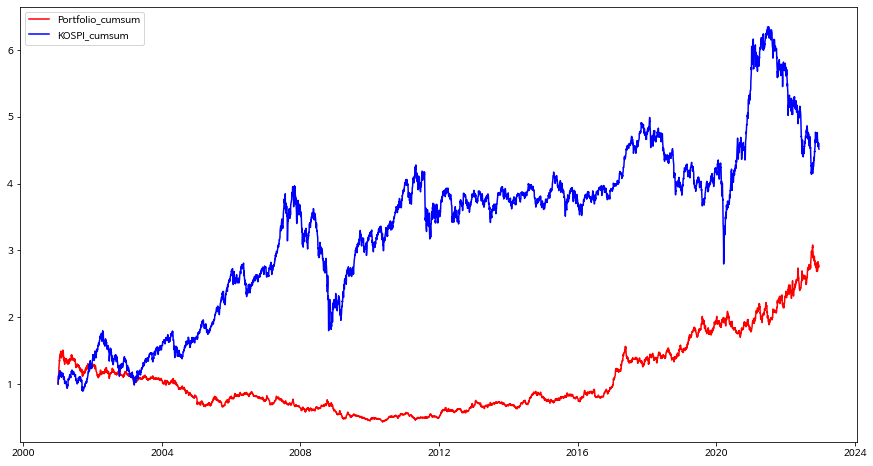

In [342]:
plt.figure(figsize = (15,8))
plt.plot(np.exp(np.cumsum(profits).sum(axis = 1)/20), label = 'Portfolio_cumsum', color = 'red')
plt.plot(np.exp(np.cumsum(logkospi)), label = 'KOSPI_cumsum', color = 'blue')
plt.legend()

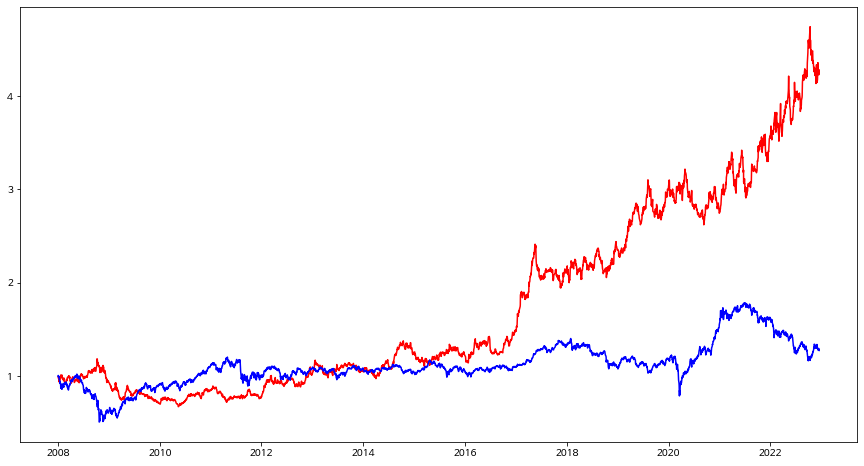

In [312]:
plt.figure(figsize = (15,8))
plt.plot(np.exp(np.cumsum(profits_).sum(axis = 1)/20), label = 'Portfolio_cumsum', color = 'red')
plt.plot(np.exp(np.cumsum(logkospi)), label = 'KOSPI_cumsum', color = 'blue')

In [ ]:
(profits[profits.index.year == i]).sum(axis = 1)

2022-01-04    0.422771
2022-01-05    0.313277
2022-01-06   -0.256156
2022-01-07   -0.199917
2022-01-10   -0.338341
                ...   
2022-12-12   -0.096383
2022-12-13    0.103499
2022-12-14   -0.204372
2022-12-15    0.152812
2022-12-16    0.099146
Length: 236, dtype: float64

In [314]:
annual_yield_indicator((profits).sum(axis = 1)/20)

Annualized return :  0.05
Annualized std :  0.18
Sharpe ratio :  0.26
Maximum drawdown(MDD) :  1.24


In [316]:
annual_yield_indicator((logkospi))

Annualized return :  0.02
Annualized std :  0.2
Sharpe ratio :  0.08
Maximum drawdown(MDD) :  0.7


In [321]:
np.exp(0.2)

1.2214027581601699

In [313]:
annual_yield_indicator((profits_).sum(axis = 1)/20)

Annualized return :  0.1
Annualized std :  0.18
Sharpe ratio :  0.56
Maximum drawdown(MDD) :  0.57


In [320]:
np.exp(0.56)

1.7506725002961012

# 2008년 ~ 2009년

In [258]:
profits_1 = profits[profits.index.year == 2008]
profits_1 = pd.concat([profits_1, profits[profits.index.year == 2009]], axis = 0)
profits_1

log return  log return  log return  log return  log return  \
2008-01-03   -0.137450   -0.075497   -0.018077   -0.049193    0.107822   
2008-01-04    0.110995   -0.118627   -0.008531    0.011297    0.012370   
2008-01-07   -0.012970    0.015325    0.063008    0.036558    0.008332   
2008-01-08   -0.054274   -0.204190    0.060285    0.009828   -0.015905   
2008-01-09    0.054274   -0.137846   -0.046490   -0.032971    0.012435   
...                ...         ...         ...         ...         ...   
2009-12-23    0.066986    0.029523   -0.043262    0.029758    0.008286   
2009-12-24   -0.012848    0.016641    0.013643   -0.003770   -0.020687   
2009-12-28    0.047504    0.077594    0.010430   -0.032396   -0.102569   
2009-12-29    0.014692   -0.034118   -0.040864    0.057164    0.033342   
2009-12-30   -0.006166   -0.073471   -0.071820   -0.071780    0.069934   

            log return  log return  log return  log return  log return  
2008-01-03    0.040302   -0.012151    0.011317   -0.137824    0.075715  
2008-01-04   -0.123658    0.000271    0.012345   -0.097674   -0.008014  
2008-01-07   -0.043111   -0.029753   -0.061875   -0.156600    0.032412  
2008-01-08   -0.049049   -0.038528   -0.006306   -0.156370    0.010031  
2008-01-09   -0.006213    0.015033    0.010500   -0.143798    0.004865  
...                ...         ...         ...         ...         ...  
2009-12-23    0.002081   -0.003502   -0.015049    0.000000    0.000000  
2009-12-24    0.010471   -0.001145    0.000451   -0.014467    0.000000  
2009-12-28    0.009197   -0.020846   -0.083916   -0.141755    0.000000  
2009-12-29   -0.115272   -0.011772    0.010089    0.008352    0.000000  
2009-12-30    0.024300    0.049929    0.019684   -0.023797    0.000000  

[499 rows x 10 columns]

In [263]:
KOSPI_1 = stock.get_index_ohlcv('20080101', '20091231', '1001')
KOSPI_1['log price'] = np.log(KOSPI_1['종가'])
KOSPI_1['log return'] = KOSPI_1['log price'].diff()
logkospi_1 = KOSPI_1['log return'].dropna()

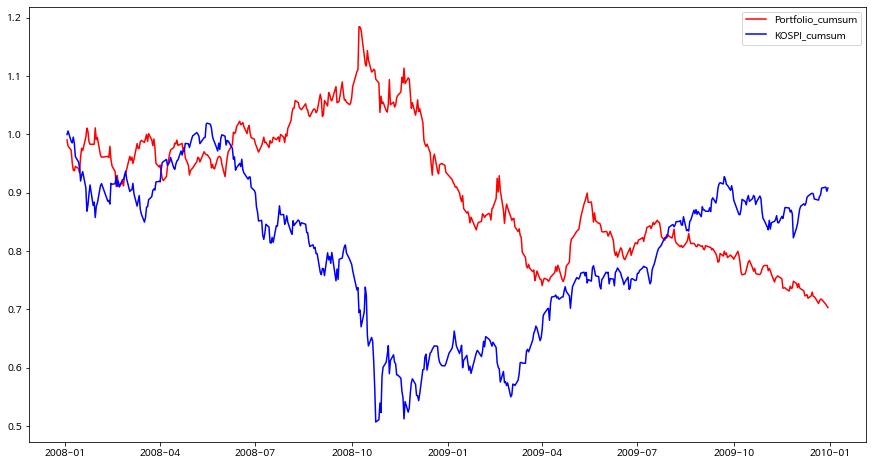

In [ ]:
plt.figure(figsize = (15,8))
plt.plot(np.exp(np.cumsum(profits_1).sum(axis = 1)/20), label = 'Portfolio_cumsum', color = 'red')
plt.plot(np.exp(np.cumsum(logkospi_1)), label = 'KOSPI_cumsum', color = 'blue')
plt.legend()

In [323]:
profits_1

log return  log return  log return  log return  log return  \
2008-01-03   -0.137450   -0.075497   -0.018077   -0.049193    0.107822   
2008-01-04    0.110995   -0.118627   -0.008531    0.011297    0.012370   
2008-01-07   -0.012970    0.015325    0.063008    0.036558    0.008332   
2008-01-08   -0.054274   -0.204190    0.060285    0.009828   -0.015905   
2008-01-09    0.054274   -0.137846   -0.046490   -0.032971    0.012435   
...                ...         ...         ...         ...         ...   
2009-12-23    0.066986    0.029523   -0.043262    0.029758    0.008286   
2009-12-24   -0.012848    0.016641    0.013643   -0.003770   -0.020687   
2009-12-28    0.047504    0.077594    0.010430   -0.032396   -0.102569   
2009-12-29    0.014692   -0.034118   -0.040864    0.057164    0.033342   
2009-12-30   -0.006166   -0.073471   -0.071820   -0.071780    0.069934   

            log return  log return  log return  log return  log return  
2008-01-03    0.040302   -0.012151    0.011317   -0.137824    0.075715  
2008-01-04   -0.123658    0.000271    0.012345   -0.097674   -0.008014  
2008-01-07   -0.043111   -0.029753   -0.061875   -0.156600    0.032412  
2008-01-08   -0.049049   -0.038528   -0.006306   -0.156370    0.010031  
2008-01-09   -0.006213    0.015033    0.010500   -0.143798    0.004865  
...                ...         ...         ...         ...         ...  
2009-12-23    0.002081   -0.003502   -0.015049    0.000000    0.000000  
2009-12-24    0.010471   -0.001145    0.000451   -0.014467    0.000000  
2009-12-28    0.009197   -0.020846   -0.083916   -0.141755    0.000000  
2009-12-29   -0.115272   -0.011772    0.010089    0.008352    0.000000  
2009-12-30    0.024300    0.049929    0.019684   -0.023797    0.000000  

[499 rows x 10 columns]

In [301]:
annual_yield_indicator((profits_1).sum(axis = 1)/20)

Annualized return :  -0.18
Annualized std :  0.21
Sharpe ratio :  -0.87
Maximum drawdown(MDD) :  0.52


In [324]:
annual_yield_indicator(logkospi_1)

Annualized return :  -0.05
Annualized std :  0.33
Sharpe ratio :  -0.15
Maximum drawdown(MDD) :  0.7


In [315]:
np.exp(-0.18)

0.835270211411272

# 2010년 ~ 2019년

In [259]:
profits_2 = pd.DataFrame()
for i in range(2010, 2020):
    profits_2 = pd.concat([profits_2, profits[profits.index.year == i]], axis = 0)

In [265]:
KOSPI_2 = stock.get_index_ohlcv('20100101', '20191231', '1001')
KOSPI_2['log price'] = np.log(KOSPI_2['종가'])
KOSPI_2['log return'] = KOSPI_2['log price'].diff()
logkospi_2 = KOSPI_2['log return'].dropna()

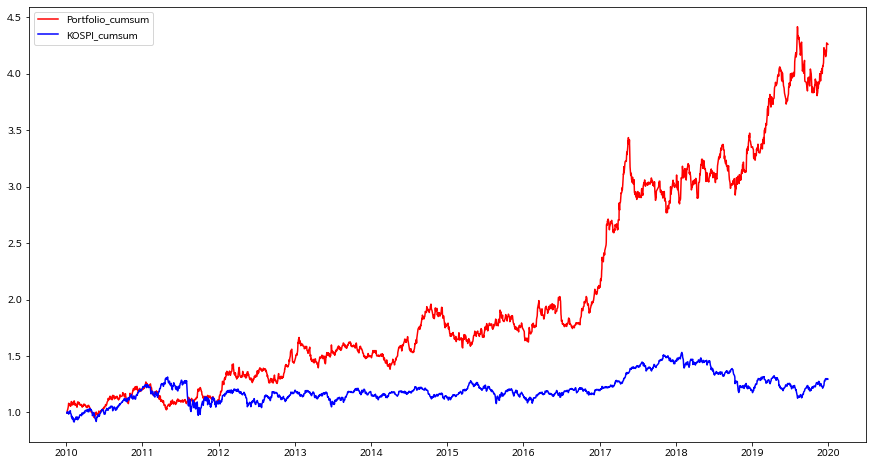

In [322]:
plt.figure(figsize = (15,8))
plt.plot(np.exp(np.cumsum(profits_2).sum(axis = 1)/20), label = 'Portfolio_cumsum', color = 'red')
plt.plot(np.exp(np.cumsum(logkospi_2)), label = 'KOSPI_cumsum', color = 'blue')
plt.legend()

In [ ]:
annual_yield_indicator((profits_2).sum(axis = 1)/20)

Annualized return :  0.15
Annualized std :  0.17
Sharpe ratio :  0.89
Maximum drawdown(MDD) :  0.22


In [327]:
annual_yield_indicator(logkospi_2)

Annualized return :  0.03
Annualized std :  0.15
Sharpe ratio :  0.18
Maximum drawdown(MDD) :  0.31


# 2020년 ~ 2022년

In [261]:
profits_3 = pd.DataFrame()
for i in range(2020, 2023):
    profits_3 = pd.concat([profits_3, profits[profits.index.year == i]], axis = 0)

In [267]:
KOSPI_3 = stock.get_index_ohlcv('20200101', '20221231', '1001')
KOSPI_3['log price'] = np.log(KOSPI_3['종가'])
KOSPI_3['log return'] = KOSPI_3['log price'].diff()
logkospi_3 = KOSPI_3['log return'].dropna()

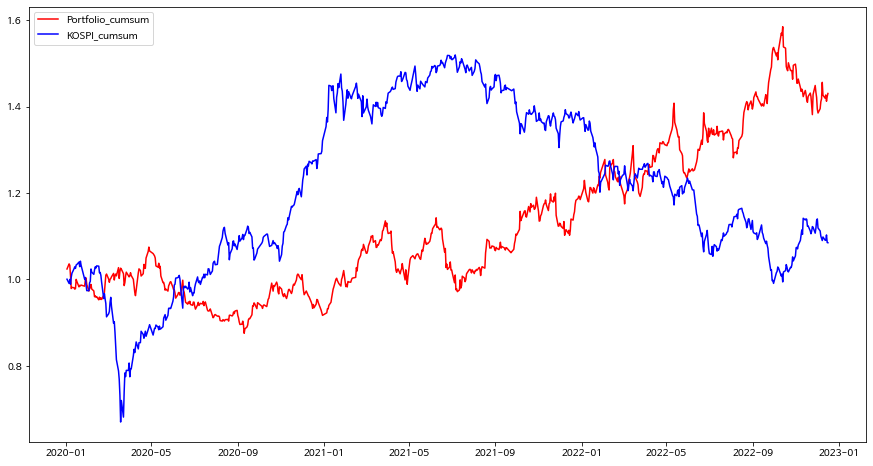

In [281]:
plt.figure(figsize = (15,8))
plt.plot(np.exp(np.cumsum(profits_3).sum(axis = 1)/20), label = 'Portfolio_cumsum', color = 'red')
plt.plot(np.exp(np.cumsum(logkospi_3)), label = 'KOSPI_cumsum', color = 'blue')
plt.legend()

In [ ]:
annual_yield_indicator((profits_3).sum(axis = 1)/20)

Annualized return :  0.12
Annualized std :  0.19
Sharpe ratio :  0.66
Maximum drawdown(MDD) :  0.21


In [328]:
annual_yield_indicator(logkospi_3)

Annualized return :  0.03
Annualized std :  0.22
Sharpe ratio :  0.13
Maximum drawdown(MDD) :  0.44


In [ ]:
print('Annualized return : ', np.round(np.mean(yield_)*252, 2))
print('Maximum drawdown(MDD) : ', np.round(mdd(yield_),2))

In [336]:
annual_return = []
annual_mdd = []
for i in range(2008,2023):
    annual_return.append(np.round(np.mean((profits[profits.index.year == i]).sum(axis = 1)/20)*252, 2))
    annual_mdd.append(np.round(mdd(profits[profits.index.year == i]), 2))

In [337]:
np.sum(annual_return)/15

0.09866666666666665